In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Dataset includes Spotify top songs of 2010-2019
    100 songs per each year -> total 1000 songs
    
    title	Song's Title
    artist	Song's artist
    genre	Genre of song
    year released	Year the song was released
    added	Day song was added to Spotify's Top Hits playlist
    bpm	Beats Per Minute - The tempo of the song
    nrgy	Energy - How energetic the song is
    dnce	Danceability - How easy it is to dance to the song
    dB	Decibel - How loud the song is
    live	How likely the song is a live recording
    val	How positive the mood of the song is
    dur	Duration of the song
    acous	How acoustic the song is
    spch	The more the song is focused on spoken word
    pop	Popularity of the song (not a ranking)
    top year	Year the song was a top hit
    artist type	Tells if artist is solo, duo, trio, or a band


In [3]:
df = pd.read_excel('Spotify 2010 - 2019 Top 100 Songs.xlsx')
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [4]:
df.shape

(1000, 17)

In [5]:
df.columns

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

In [6]:
# Split dataframe to dataframes by year
df_top_year2010 = df[df['top year'] == 2010]
df_top_year2011 = df[df['top year'] == 2011]
df_top_year2012 = df[df['top year'] == 2012]
df_top_year2013 = df[df['top year'] == 2013]
df_top_year2014 = df[df['top year'] == 2014]
df_top_year2015 = df[df['top year'] == 2015]
df_top_year2016 = df[df['top year'] == 2016]
df_top_year2017 = df[df['top year'] == 2017]
df_top_year2018 = df[df['top year'] == 2018]
df_top_year2019 = df[df['top year'] == 2019]

## Find Top Artists who have not less than 10 top songs over 2010-2019

In [7]:
dfTopArtists = df['artist'].value_counts().to_frame().reset_index()
dfTopArtists.columns = ['artist', 'number of songs in top 100']
dfTopArtists = dfTopArtists[dfTopArtists['number of songs in top 100'] >= 10]
dfTopArtists

,artist,number of songs in top 100
0,Taylor Swift,21
1,Drake,18
2,Calvin Harris,18
3,Rihanna,14
4,Ariana Grande,14
5,Bruno Mars,13
6,Maroon 5,11
7,Post Malone,10
8,Jason Derulo,10
9,Ed Sheeran,10


Text(0.5, 1.0, 'Artists with the most number of songs in top chart')

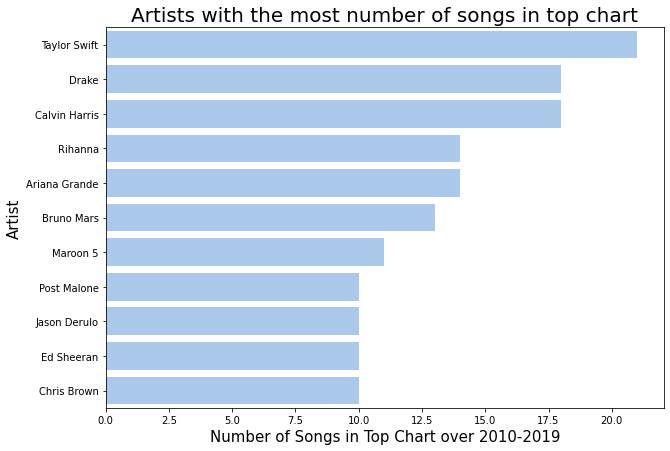

In [8]:
# make barplot
plt.figure(figsize=(10,7))
sns.set_color_codes("pastel")
ax = sns.barplot(y='artist', x='number of songs in top 100', data=dfTopArtists, color='b')
ax.set_xlabel('Number of Songs in Top Chart over 2010-2019', fontsize=15)
ax.set_ylabel('Artist', fontsize = 15)
ax.set_title('Artists with the most number of songs in top chart', fontsize=20)

## Find Top Genres

In [9]:
dfTopGenre = df['top genre'].value_counts().to_frame().reset_index()
dfTopGenre.columns = ['genre', 'count']
dfTopGenre = dfTopGenre[dfTopGenre['count'] > 15]

Text(0.5, 1.0, 'Top Song Genres in Top Chart')

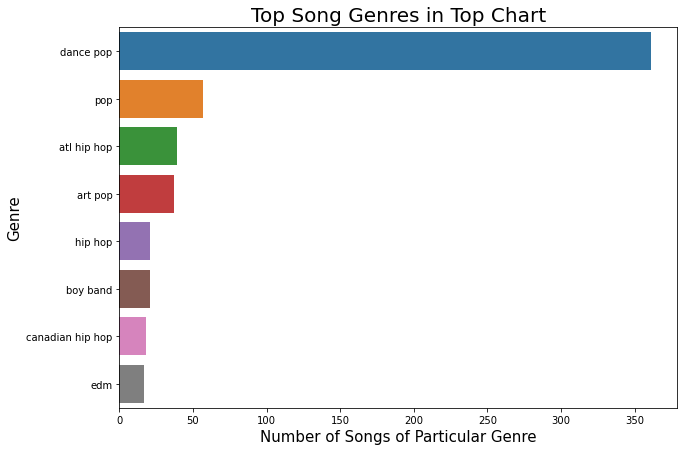

In [10]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x='count', y='genre', data=dfTopGenre)
ax.set_xlabel('Number of Songs of Particular Genre', fontsize=15)
ax.set_ylabel('Genre', fontsize=15)
ax.set_title('Top Song Genres in Top Chart', fontsize=20)

## Find top Artist Type

In [11]:
df['artist type'].unique()

array(['Duo', 'Solo', 'Band/Group', 'Trio'], dtype=object)

In [12]:
dfArtistType = df['artist type'].value_counts()
dfArtistType

Solo          748
Band/Group    169
Duo            70
Trio           13
Name: artist type, dtype: int64

In [13]:
## How many years after release did the song get into the top chart?
## (Are there repeated songs in top charts for several years in a row?)

## Songs in Top Chart

In [16]:
# Find songs names which appeared in a top chart > 2 times
dfSongType = df['title'].value_counts().to_frame().reset_index()
dfSongType.columns = ['song', 'count']
dfSong3times = dfSongType[dfSongType['count'] > 2]
dfSong3times

,song,count
0,Paradise,3
1,Sorry,3
2,Don't,3


In [17]:
# Find songs which appears three times
dfSongCount3times = dfSongType[dfSongType['count'] == 3]
dfSongCount3times

dfSongs3Times = pd.DataFrame()
for name in dfSongCount3times['song']:
    dfSong = df[df['title'] == name]
    display(dfSong)
    dfSong = dfSong.reset_index(drop=True)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
124,Paradise,Coldplay,permanent wave,2011,2020‑06‑16,140,59,45,-7,8,21,279,5,3,88,2011,Band/Group
220,Paradise,Coldplay,permanent wave,2011,2020‑06‑22,140,59,45,-7,8,21,279,5,3,88,2012,Band/Group
840,Paradise,George Ezra,folk-pop,2018,2020‑06‑22,138,88,64,-4,21,91,222,21,4,73,2018,Solo


,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
610,Sorry,Beyoncé,dance pop,2016,2020‑08‑11,130,60,78,-7,25,36,233,0,5,72,2016,Solo
649,Sorry,Justin Bieber,canadian pop,2015,2020‑06‑08,100,76,65,-4,30,41,201,8,5,85,2016,Solo
940,Sorry,Joel Corry,dance pop,2019,2020‑06‑22,125,79,74,-5,32,85,189,5,6,68,2019,Solo


,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
429,Don't,Ed Sheeran,pop,2014,2020‑06‑10,95,61,81,-7,64,85,220,1,7,78,2014,Solo
509,Don't,Bryson Tiller,kentucky hip hop,2015,2020‑06‑19,97,36,77,-6,10,19,198,22,20,83,2015,Solo
611,Don't,Bryson Tiller,kentucky hip hop,2015,2020‑08‑11,97,36,77,-6,10,19,198,22,20,83,2016,Solo


In [18]:
# Song Paradise by Coldplay - 2 times
# Song Sorry - all different artists
# Song Don't by Bryson Tiller - 2 times

In [69]:
# Find songs which NAME appears two times
# Could be songs by different artists (will check later)
dfSongCount2times = dfSongType[dfSongType['count'] == 2].reset_index(drop=True)

In [68]:
# Create detailed list that includes songs appearing 2 times
dfSongs2Times = pd.DataFrame()
# For each song that appears twice, check that artist is the same
for name in dfSongCount2times['song']:
    dfSong = df[df['title'] == name]
    dfSong = dfSong.reset_index(drop=True)
    if (dfSong.loc[0, 'artist'] == dfSong.loc[1, 'artist']):
        dfSongs2Times = dfSongs2Times.append(dfSong.loc[0])

# Additionally manually append Song Paradise by Coldplay and Song Don't by Bryson Tiller
dfSongs2Times = dfSongs2Times.append(df[(df['title'] == 'Paradise') & (df['artist'] == 'Coldplay')].iloc[0,:])
dfSongs2Times = dfSongs2Times.append(df[(df['title'] == 'Don\'t') & (df['artist'] == 'Bryson Tiller')].iloc[0,:])

dfSongs2Times = dfSongs2Times.reset_index(drop=True)

print(dfSongs2Times.shape)
display(dfSongs2Times)

# 42 songs appeared in top charts twice

(42, 17)


,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,No Hands (feat. Roscoe Dash & Wale),Waka Flocka Flame,atl hip hop,2010.0,2022‑02‑17,131.0,60.0,76.0,-6.0,24.0,36.0,264.0,1.0,4.0,63.0,2010.0,Solo
1,What's My Name?,Rihanna,barbadian pop,2010.0,2022‑02‑17,100.0,78.0,69.0,-3.0,8.0,56.0,263.0,18.0,7.0,75.0,2010.0,Solo
2,Better Now,Post Malone,dfw rap,2018.0,2020‑06‑22,145.0,58.0,68.0,-6.0,14.0,34.0,231.0,33.0,4.0,84.0,2018.0,Solo
3,All My Friends (feat. Tinashe & Chance the Rap...,Snakehips,edm,2015.0,2020‑06‑22,95.0,52.0,68.0,-6.0,11.0,18.0,230.0,12.0,14.0,77.0,2015.0,Duo
4,I Knew You Were Trouble.,Taylor Swift,pop,2012.0,2020‑06‑22,77.0,47.0,62.0,-7.0,3.0,68.0,220.0,0.0,4.0,82.0,2012.0,Solo
5,Stole the Show,Kygo,edm,2016.0,2020‑06‑19,100.0,64.0,64.0,-8.0,32.0,48.0,223.0,27.0,23.0,78.0,2015.0,Solo
6,Talk Dirty (feat. 2 Chainz),Jason Derulo,dance pop,2013.0,2020‑06‑11,100.0,65.0,76.0,-7.0,31.0,76.0,178.0,3.0,23.0,71.0,2013.0,Solo
7,Ho Hey,The Lumineers,folk-pop,2012.0,2020‑06‑22,80.0,47.0,69.0,-9.0,9.0,35.0,163.0,79.0,3.0,77.0,2012.0,Band/Group
8,Post to Be (feat. Chris Brown & Jhene Aiko),Omarion,dance pop,2014.0,2020‑06‑10,97.0,68.0,73.0,-6.0,21.0,70.0,227.0,7.0,4.0,60.0,2014.0,Solo
9,Sexy And I Know It,LMFAO,dance pop,2011.0,2020‑06‑16,130.0,86.0,71.0,-4.0,19.0,80.0,199.0,10.0,32.0,68.0,2011.0,Duo


In [164]:
# String comprehension not working # CHECK
# (df['title'] == name) for name in ['song']

# dftest = df[df['title'] == name] for name in ['History']
# dftest

In [70]:
pwd

'/Users/Alena/Data_Science/Spotify_Songs'